In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import os
import shutil
import kagglehub
johnsmith88_heart_disease_dataset_path = kagglehub.dataset_download('johnsmith88/heart-disease-dataset')

print('Data source import complete.')


100%|██████████| 6.18k/6.18k [00:00<00:00, 6.42MB/s]

Extracting files...
Data source import complete.


## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There is 1 csv file in the current version of the dataset:


In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [14]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna() # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [21]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/heart.csv

In [8]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# heart.csv has 1025 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/heart.csv', delimiter=',')
df1.dataframeName = 'heart.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1025 rows and 14 columns


Let's take a quick look at what the data looks like:

In [9]:
df1.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df1)

https://docs.google.com/spreadsheets/d/1KzWJ8F9jiWIPcrL9PWHKgaImRQZkjfcM1DKMisyaMZo#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


Distribution graphs (histogram/bar graph) of sampled columns:

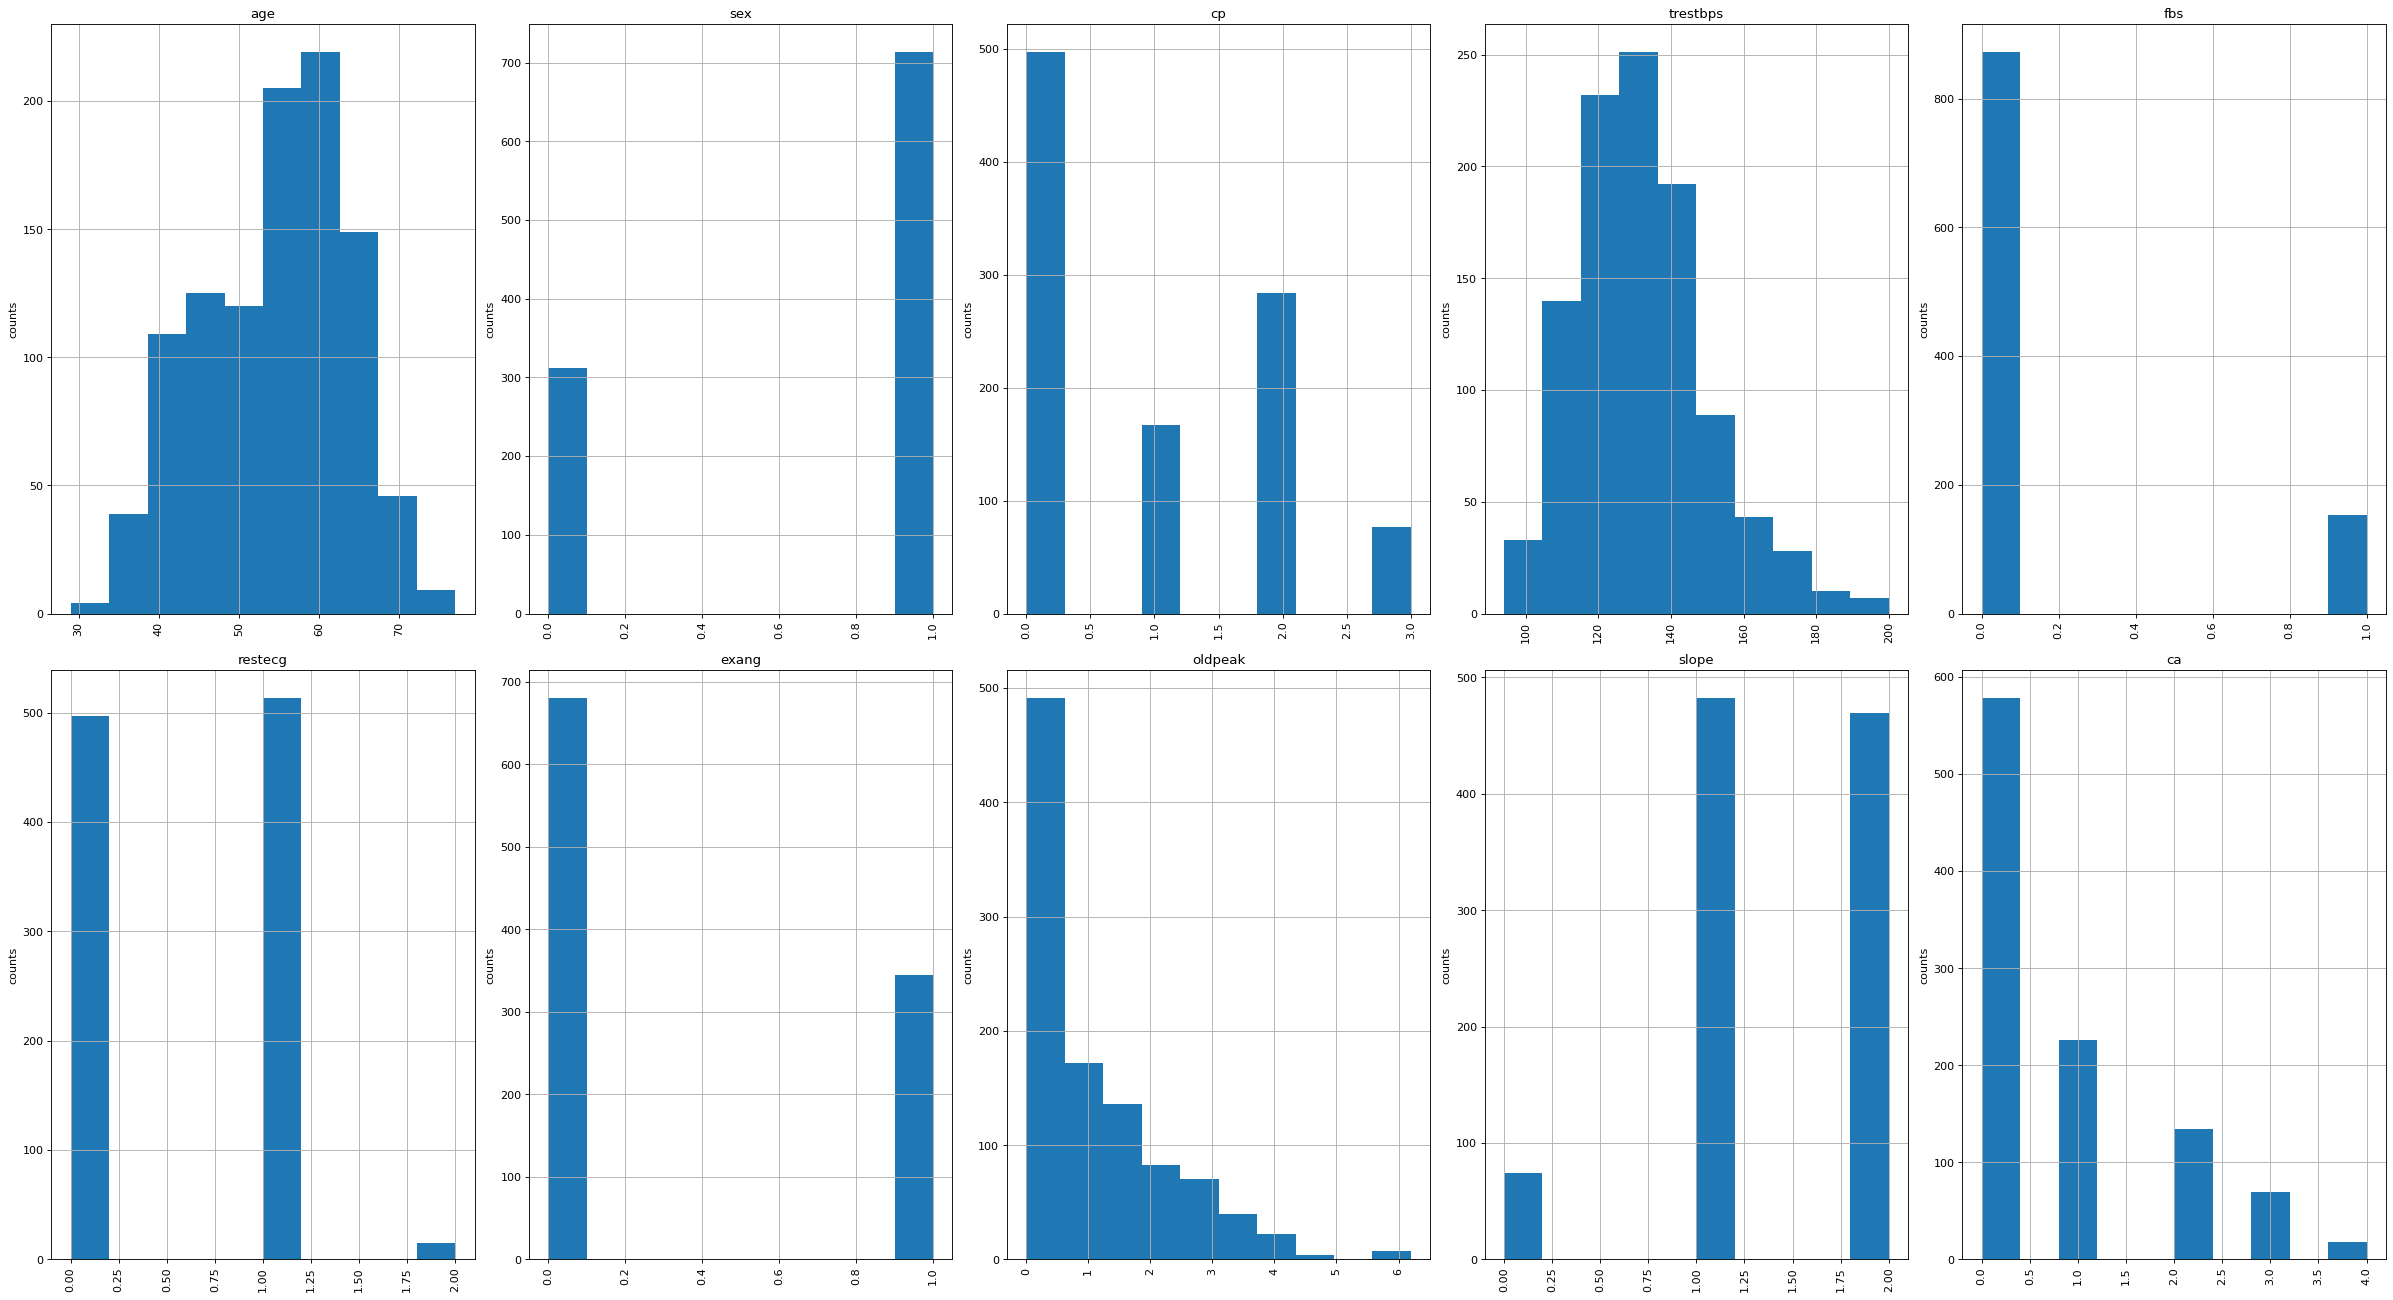

In [19]:
plotPerColumnDistribution(df1, 10, 5)

In [18]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    # For displaying purposes, pick columns that have between 1 and 50 unique values
    df = df[[col for col in df if 1 < nunique[col] < 50]]
    nRow, nCol = df.shape

    # Calculate the number of graph rows, ensuring it's an integer by using math.ceil
    nGraphRow = math.ceil(nCol / nGraphPerRow)

    # A figure is created with the given specifications
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')

    # Iterate through each column for plotting
    for i in range(min(nCol, nGraphShown)):
        # Create a subplot for the current column
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)

        # Extract data for the current column
        columnDf = df.iloc[:, i]

        # Check if the data type of the first element in the column is not numerical
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            # Plot a bar chart if the data is non-numerical
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            # Plot a histogram if the data is numerical
            columnDf.hist()

        # Set the title of the subplot to the column name
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnDf.name}')

    # Display the created figure with all subplots
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

Correlation matrix:

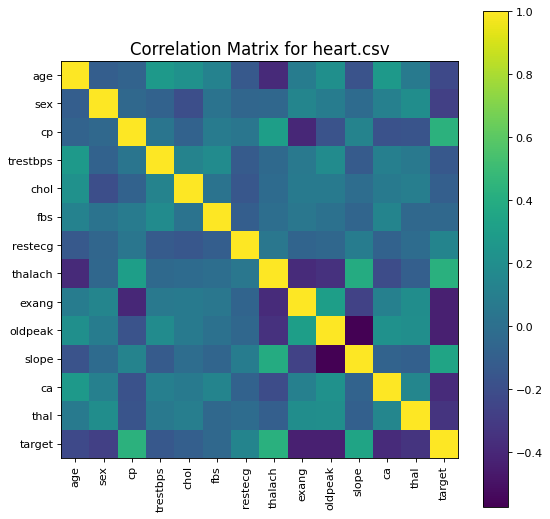

In [17]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

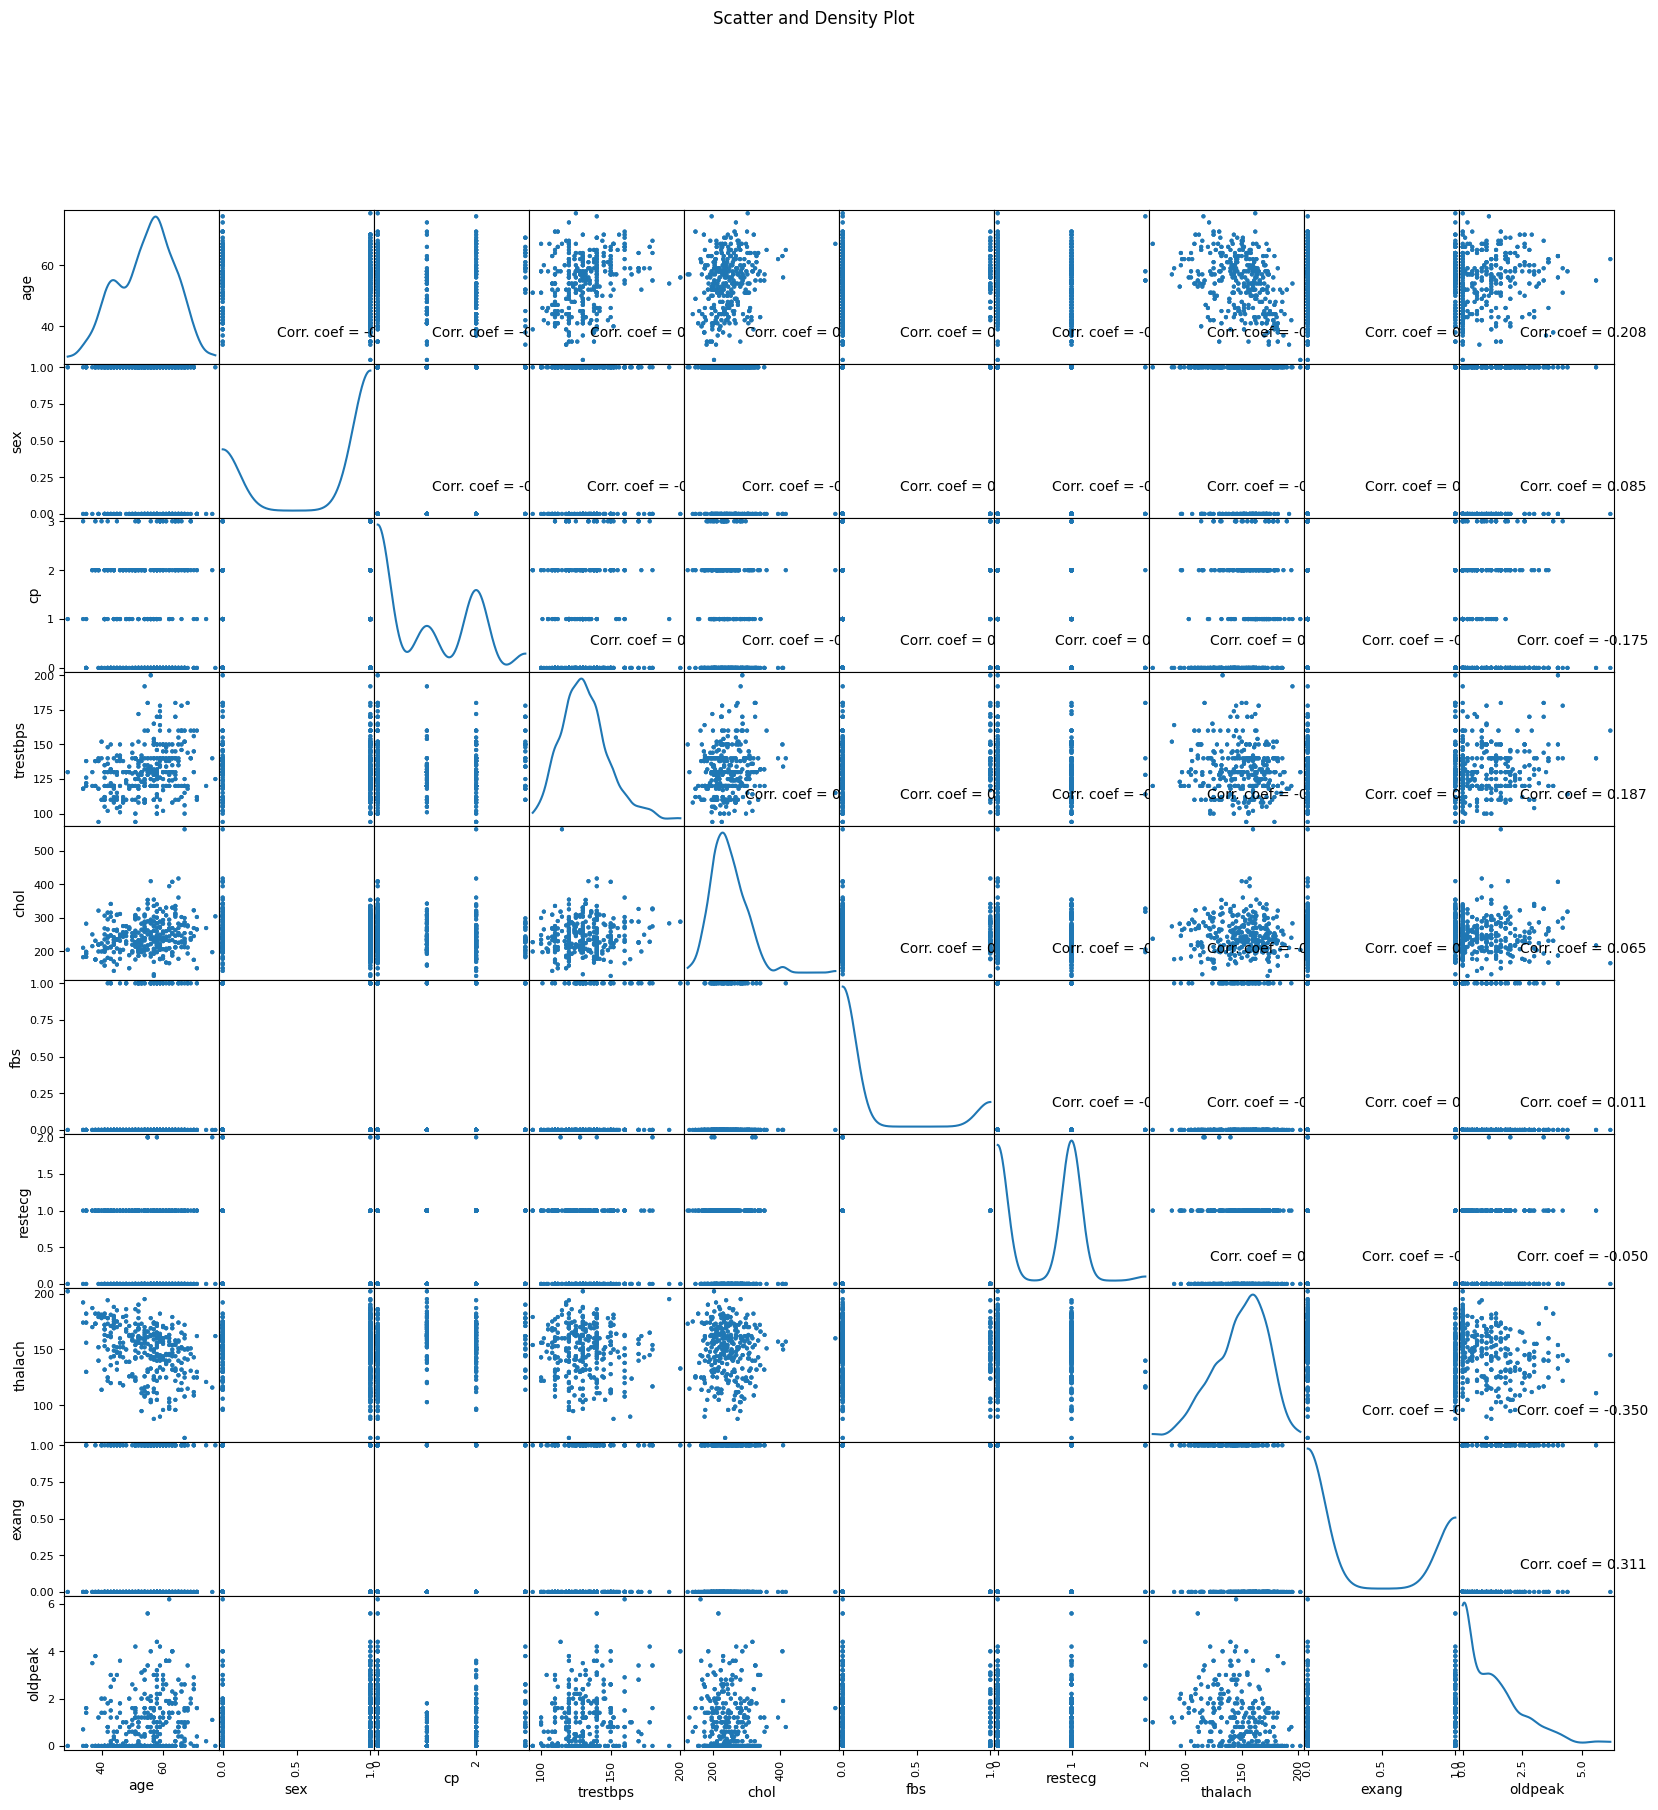

In [22]:
plotScatterMatrix(df1, 20, 10)

In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import plotly.express as px

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset (adjust the file path as needed)
# Replace 'data.csv' with the path to your dataset
data = pd.read_csv('/content/heart.csv')

# Assume 'target' is the column name for the dependent variable (adjust as per your data)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store models and their confusion matrices
models = {}
confusion_matrices = {}

# 1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
confusion_matrices['Logistic Regression'] = confusion_matrix(y_test, y_pred_log)

# 2. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
confusion_matrices['KNN'] = confusion_matrix(y_test, y_pred_knn)

# 3. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
confusion_matrices['Naive Bayes'] = confusion_matrix(y_test, y_pred_nb)

# 4. Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
confusion_matrices['SVM'] = confusion_matrix(y_test, y_pred_svm)

# 5. XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
confusion_matrices['XGBoost'] = confusion_matrix(y_test, y_pred_xgb)

# 6. Neural Network
nn = Sequential()
nn.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
nn.add(Dense(8, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
y_pred_nn = (nn.predict(X_test) > 0.5).astype(int)
confusion_matrices['Neural Network'] = confusion_matrix(y_test, y_pred_nn)

# Function to plot confusion matrices using Plotly
def plot_confusion_matrix(cm, title):
    fig = px.imshow(cm, text_auto=True, color_continuous_scale='Blues',
                    labels=dict(x='Predicted', y='Actual', color='Count'))
    fig.update_layout(title=title, xaxis_title='Predicted', yaxis_title='Actual')
    fig.show()

# Plot all confusion matrices
for model_name, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, f'Confusion Matrix for {model_name}')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:13:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Edit Notebook" button at the top of the kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!

In [24]:
# Import accuracy score from sklearn
from sklearn.metrics import accuracy_score

# Dictionary to store accuracies
accuracies = {}

# 1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
confusion_matrices['Logistic Regression'] = confusion_matrix(y_test, y_pred_log)
accuracies['Logistic Regression'] = accuracy_score(y_test, y_pred_log)

# 2. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
confusion_matrices['KNN'] = confusion_matrix(y_test, y_pred_knn)
accuracies['KNN'] = accuracy_score(y_test, y_pred_knn)

# 3. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
confusion_matrices['Naive Bayes'] = confusion_matrix(y_test, y_pred_nb)
accuracies['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)

# 4. Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
confusion_matrices['SVM'] = confusion_matrix(y_test, y_pred_svm)
accuracies['SVM'] = accuracy_score(y_test, y_pred_svm)

# 5. XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
confusion_matrices['XGBoost'] = confusion_matrix(y_test, y_pred_xgb)
accuracies['XGBoost'] = accuracy_score(y_test, y_pred_xgb)

# 6. Neural Network
nn = Sequential()
nn.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
nn.add(Dense(8, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
y_pred_nn = (nn.predict(X_test) > 0.5).astype(int)
confusion_matrices['Neural Network'] = confusion_matrix(y_test, y_pred_nn)
accuracies['Neural Network'] = accuracy_score(y_test, y_pred_nn)

# Displaying the accuracies
for model_name, accuracy in accuracies.items():
    print(f'Accuracy of {model_name}: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[20:17:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy of Logistic Regression: 80.52%
Accuracy of KNN: 84.09%
Accuracy of Naive Bayes: 81.49%
Accuracy of SVM: 80.84%
Accuracy of XGBoost: 98.05%
Accuracy of Neural Network: 94.48%


In [25]:
# Function to plot confusion matrices using Plotly with a dark theme
def plot_confusion_matrix(cm, title):
    fig = px.imshow(cm, text_auto=True, color_continuous_scale='Viridis',  # Dark color scale
                    labels=dict(x='Predicted', y='Actual', color='Count'))

    # Update layout for dark theme and better visibility
    fig.update_layout(
        title=title,
        xaxis_title='Predicted',
        yaxis_title='Actual',
        font=dict(color='white'),  # White text for better contrast
        paper_bgcolor='black',  # Dark background
        plot_bgcolor='black'  # Dark plot background
    )

    # Update color of text inside heatmap (color should contrast with background)
    fig.update_traces(textfont=dict(size=18, color='white'))  # Larger and brighter text inside the map

    # Display the heatmap
    fig.show()

# Plot all confusion matrices with the new dark theme
for model_name, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, f'Confusion Matrix for {model_name}')


In [28]:
# Function to plot confusion matrices using Plotly with a dark theme and custom title
def plot_confusion_matrix(cm, title):
    fig = px.imshow(cm,
                    text_auto=True,
                    color_continuous_scale='Cividis',  # Changed the color scale
                    labels=dict(x='Predicted', y='Actual', color='Count'))

    # Update layout for dark theme and better visibility
    fig.update_layout(
        title=f'{title}<br>Heart Disease: Present or Not',  # Custom title
        xaxis_title='Predicted',
        yaxis_title='Actual',
        font=dict(color='white', size=14),  # White text for better contrast
        paper_bgcolor='black',  # Dark background
        plot_bgcolor='black'  # Dark plot background
    )

    # Update color of text inside heatmap (color should contrast with background)
    fig.update_traces(textfont=dict(size=18, color='white', family='Arial Black'))  # Bold and larger text inside the map

    # Display the heatmap
    fig.show()

# Plot all confusion matrices with the new dark theme and custom title
for model_name, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, f'Confusion Matrix for {model_name}')


In [29]:
# Function to plot confusion matrices using Plotly with a dark theme and custom title
def plot_confusion_matrix(cm, title):
    # Replace 0s and 1s in the confusion matrix with "No" and "Yes"
    cm_labels = np.array([['No', 'Yes'], ['No', 'Yes']])

    fig = px.imshow(cm,
                    text_auto=True,
                    color_continuous_scale='Cividis',  # Color scale
                    labels=dict(x='Predicted', y='Actual', color='Count'))

    # Update layout for dark theme and better visibility
    fig.update_layout(
        title=f'{title}<br>Heart Disease: Present or Not',  # Custom title
        xaxis_title='Predicted',
        yaxis_title='Actual',
        font=dict(color='white', size=14),  # White text for better contrast
        paper_bgcolor='black',  # Dark background
        plot_bgcolor='black'  # Dark plot background
    )

    # Update color of text inside heatmap (color should contrast with background)
    fig.update_traces(textfont=dict(size=18, color='white', family='Arial Black'))  # Bold and larger text inside the map

    # Update the text labels in the confusion matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            fig.add_annotation(
                x=j,
                y=i,
                text=cm_labels[i, j],
                font=dict(color='white', size=18, family='Arial Black'),
                showarrow=False
            )

    # Display the heatmap
    fig.show()

# Plot all confusion matrices with the new dark theme and custom title
for model_name, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, f'Confusion Matrix for {model_name}')


In [30]:
# Function to plot confusion matrices using Plotly with a dark theme
def plot_confusion_matrix(cm, title):
    fig = px.imshow(cm,
                    text_auto=True,
                    color_continuous_scale='Cividis',  # Color scale
                    labels=dict(x='Predicted', y='Actual', color='Count'))

    # Update layout for dark theme and better visibility
    fig.update_layout(
        title=title,  # Just the title without additional text
        xaxis_title='Predicted',
        yaxis_title='Actual',
        font=dict(color='white', size=14),  # White text for better contrast
        paper_bgcolor='black',  # Dark background
        plot_bgcolor='black'  # Dark plot background
    )

    # Update color of text inside heatmap (color should contrast with background)
    fig.update_traces(textfont=dict(size=18, color='white', family='Arial Black'))  # Bold and larger text inside the map

    # Remove any "Yes" or "No" labels and keep the numerical values
    fig.for_each_trace(lambda t: t.update(text=cm.flatten()))

    # Display the heatmap
    fig.show()

# Plot all confusion matrices with the new dark theme
for model_name, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, f'Confusion Matrix for {model_name}')
